In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [59]:
columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']
heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv', usecols=columns)

In [60]:
def remove_outliers_iqr(data):
    
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    data = np.where(data>upper_bound, upper_bound, np.where(data<lower_bound,lower_bound,data))
    return data[(data >= lower_bound) & (data <= upper_bound)]

In [61]:
for i in heart_df.columns:
    heart_df[i] = remove_outliers_iqr(heart_df[i])

**Variables**:

**Explicada (Y)**: 
- Evento de muerte

**Explicatorias (X)**: 
- Edad
- Creatinina fosfoquinasa
- Fracción de eyección
- Plaquetas
- Creatinina en suero
- Sodio en suero

**Importamos las librerias**

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

**Datos de entrenamiento**

In [63]:
x = heart_df.drop(columns=['DEATH_EVENT']) # Explicatoria
y = heart_df['DEATH_EVENT'] # Explicada

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [65]:
modelo = LogisticRegression(max_iter= 1000)
modelo.fit(x_train, y_train)

y_predi = modelo.predict(x_test)

**Matriz de confusión**

Text(0.5, 23.52222222222222, 'Valores reales')

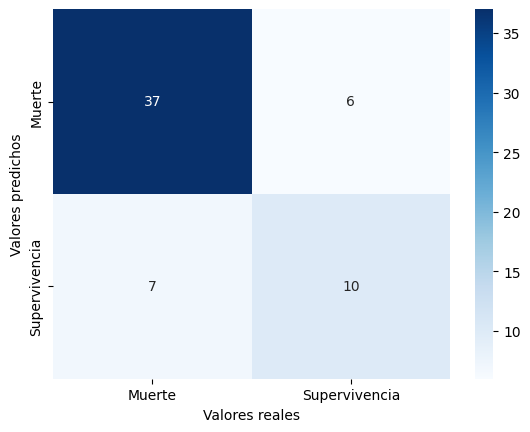

In [66]:
matriz_confusion = confusion_matrix(y_test, y_predi)

# Heatmap
sns.heatmap(matriz_confusion, annot= True, fmt= 'd', cmap= 'Blues',
            xticklabels= ['Muerte', 'Supervivencia'],
            yticklabels= ['Muerte', 'Supervivencia'])

plt.ylabel('Valores predichos')
plt.xlabel('Valores reales')

**Cálculo de metricas de evaluación**

<p align="center">
  <img src="https://www.tutorialexample.com/wp-content/uploads/2022/01/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png" alt="Matriz de confusión">
</p>

In [67]:
# Calcular la precisión del modelo
precision = precision_score(y_test, y_predi)
# Calcular la exactitud
exactitud = accuracy_score(y_test, y_predi)
# Calcular el recall
recall = recall_score(y_test, y_predi)
# Calcular el F1-score
f1 = f1_score(y_test, y_predi)


print(f'Exactitud: {exactitud:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Exactitud: 0.78
Precisión: 0.62
Recall: 0.59
F1-score: 0.61
